# Draw Figure 2

Figure 2. As in Fig. 1, except for seasonal MCS days in (a) DJF, (b) MAM, (c) JJA, and (d) SON. Data in columns 2 and 3 are masked where HIST experiences fewer than 1 MCS day per year.

# Organize the data into annual sums, annual means, and differences

In [1]:
import xarray as xr

data_dir = "../data"
analysis='mcs_days'
subset='monthly'

simulation_names = {'historical': 'HIST', 
                    'future_4p5': 'EoC 4.5', 
                    'delta_future_4p5': '$\Delta$ EoC 4.5',
                    'future_8p5': 'EoC 8.5', 
                    'delta_future_8p5': '$\Delta$ EoC 8.5'}

season_defs = {'DJF': [12, 1, 2], 
               'MAM': [3, 4, 5], 
               'JJA': [6, 7, 8],
               'SON': [9, 10, 11]}
    
season_years = {}
season_means = {}

pref = "../data"

for sim in simulation_names.keys():

    season_years[sim] = {}
    season_means[sim] = {}
    
    if sim in ['historical', 'future_4p5', 'future_8p5']:
        
        ds = xr.open_mfdataset(f"{data_dir}/{analysis}/{sim}_{subset}/*.nc")

        for season, season_months in season_defs.items():

            ds_season = ds.where(ds.time.dt.month.isin(season_months), drop=True)
            
            ds_season = ds_season.resample(time='AS-OCT').sum('time')
            ds_season = ds_season.compute()
    
            ds_mean = ds_season.mean('time')
            ds_mean = ds_mean.compute()
    
            season_years[sim][season] = ds_season
            season_means[sim][season] = ds_mean
            
    else:

        for season, season_months in season_defs.items():
            
            futr_str = sim.replace("delta_", "")
            
            season_means[sim][season] = season_means[futr_str][season] - season_means['historical'][season]
            season_years[sim][season] = None

# Draw map and results

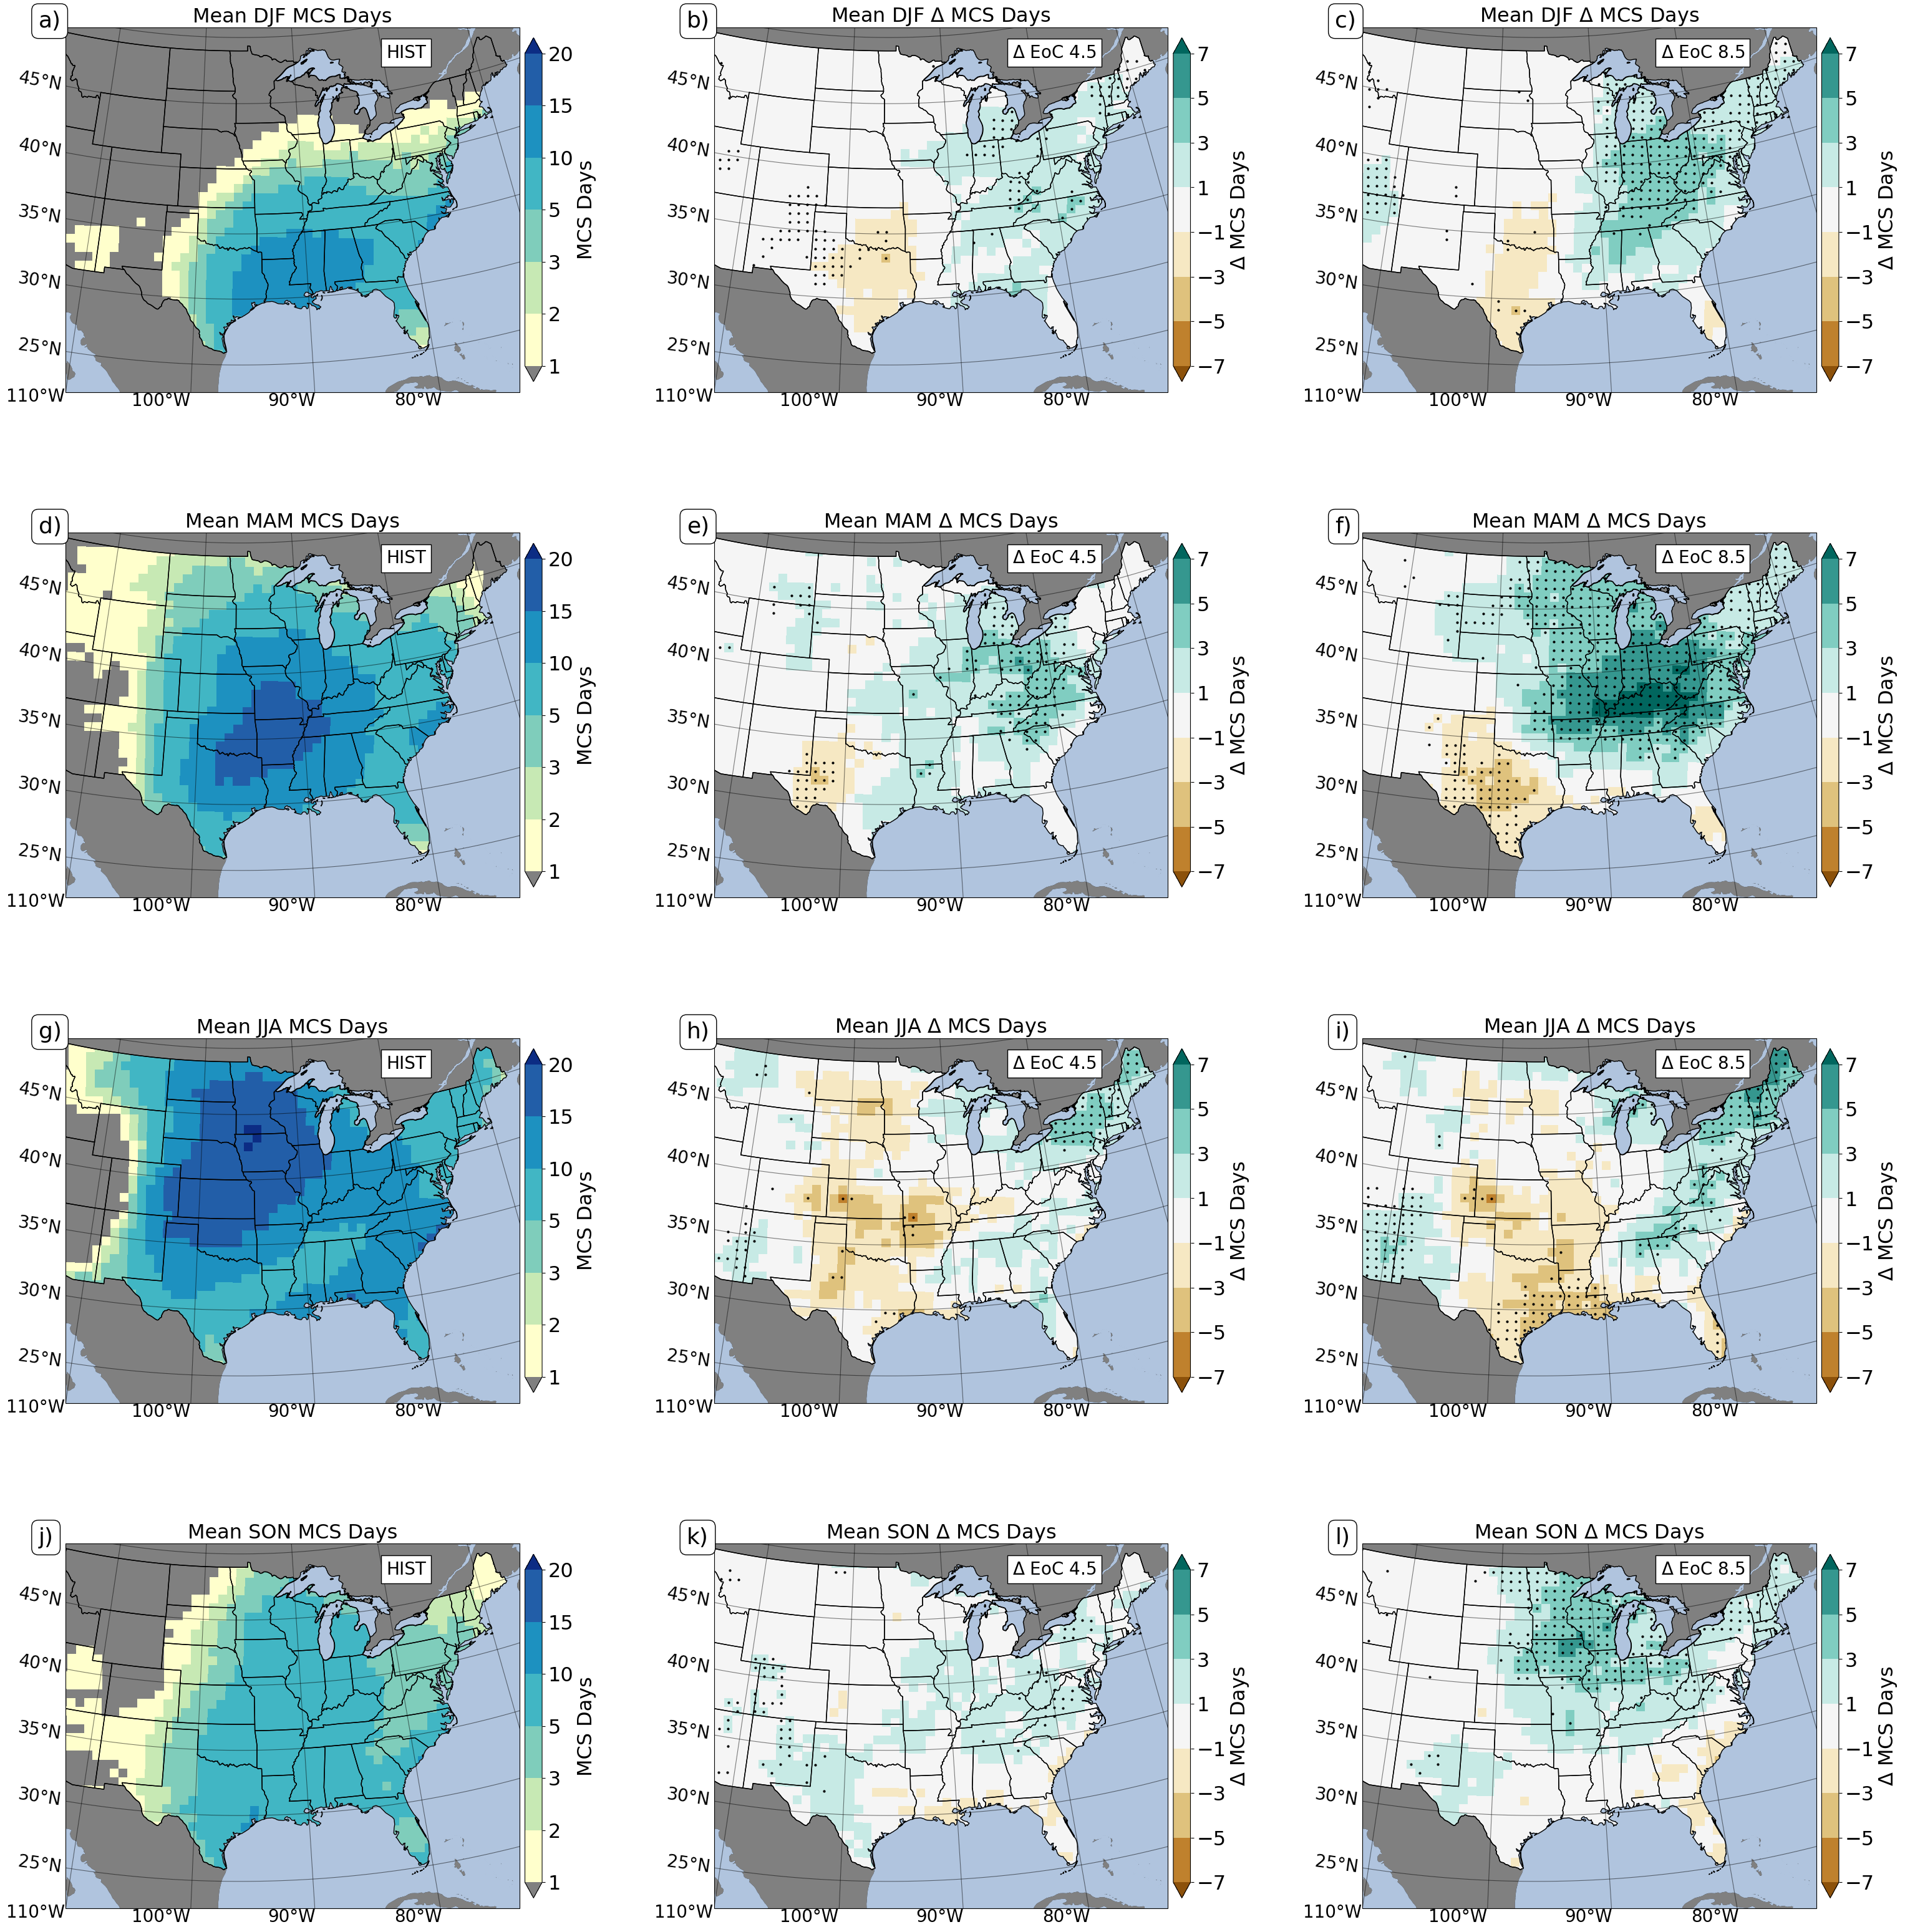

In [2]:
from mapping import setup_map, spec_ax, get_color_dict
from stats import grid_significance
import cartopy.crs as ccrs
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['xtick.labelsize'] = 23
plt.rcParams['ytick.labelsize'] = 23
plt.rcParams['axes.titlesize'] = 23
plt.rcParams['axes.labelsize'] = 23

color_info = get_color_dict(2)

fig = plt.figure(figsize=(38,40))

simulation_dispy = {'historical': 'HIST',
                    'delta_future_4p5': '$\Delta$ EoC 4.5',
                    'delta_future_8p5': '$\Delta$ EoC 8.5'}

for snum, season in enumerate(['DJF', 'MAM', 'JJA', 'SON']):

    for ax_pos, (sim_name, sim_abbr) in enumerate(simulation_dispy.items()):

        ax = spec_ax(snum, fig, 4, 3, ax_pos)

        ax = setup_map(label_num=(snum*3) + ax_pos+1, ax=ax)

        ax.annotate(f"{sim_abbr}", (0.75,0.93), 
                    xycoords='axes fraction', ha='center', va='center',
                    fontsize=20, bbox=dict(boxstyle='square', facecolor='w', alpha=1), 
                    color='k', zorder=25)

        mmp = ax.pcolormesh(season_means[sim_name][season].lon, season_means[sim_name][season].lat, 
                            season_means[sim_name][season]['MCS_Days'],
                            transform=ccrs.PlateCarree(), 
                            cmap=color_info[sim_name]['cmap'], norm=color_info[sim_name]['norm'], zorder=5)

        cbar = plt.colorbar(mmp, ax=ax, shrink=0.85, extend='both', pad=0.01)
    
        if sim_name in ['historical', 'future_4p5', 'future_8p5']:
    
            ax.set_title(f"Mean {season} MCS Days")
            
            cbar.set_label(label="MCS Days")
    
        else:
            
            futr_str = sim_name.replace("delta_", "")
            
            ax.set_title(f"Mean {season} $\Delta$ MCS Days")
            
            cbar.set_label(label="$\Delta$ MCS Days")
            
            sig = grid_significance(season_years[futr_str][season]['MCS_Days'].values, 
                                    season_years['historical'][season]['MCS_Days'].values)
    
            pts_sig = np.where(sig < 0.05)
    
            ax.plot(season_means['historical'][season].lon.values[pts_sig],
                    season_means['historical'][season].lat.values[pts_sig],
                    transform=ccrs.PlateCarree(), zorder=5, linestyle='None', 
                    marker='.', color='k', ms=4)
        
        ax.spines['geo'].set_zorder(24)
    
plt.savefig("Figure_2.png", dpi=200, bbox_inches='tight')

## Draw Supplemental Version

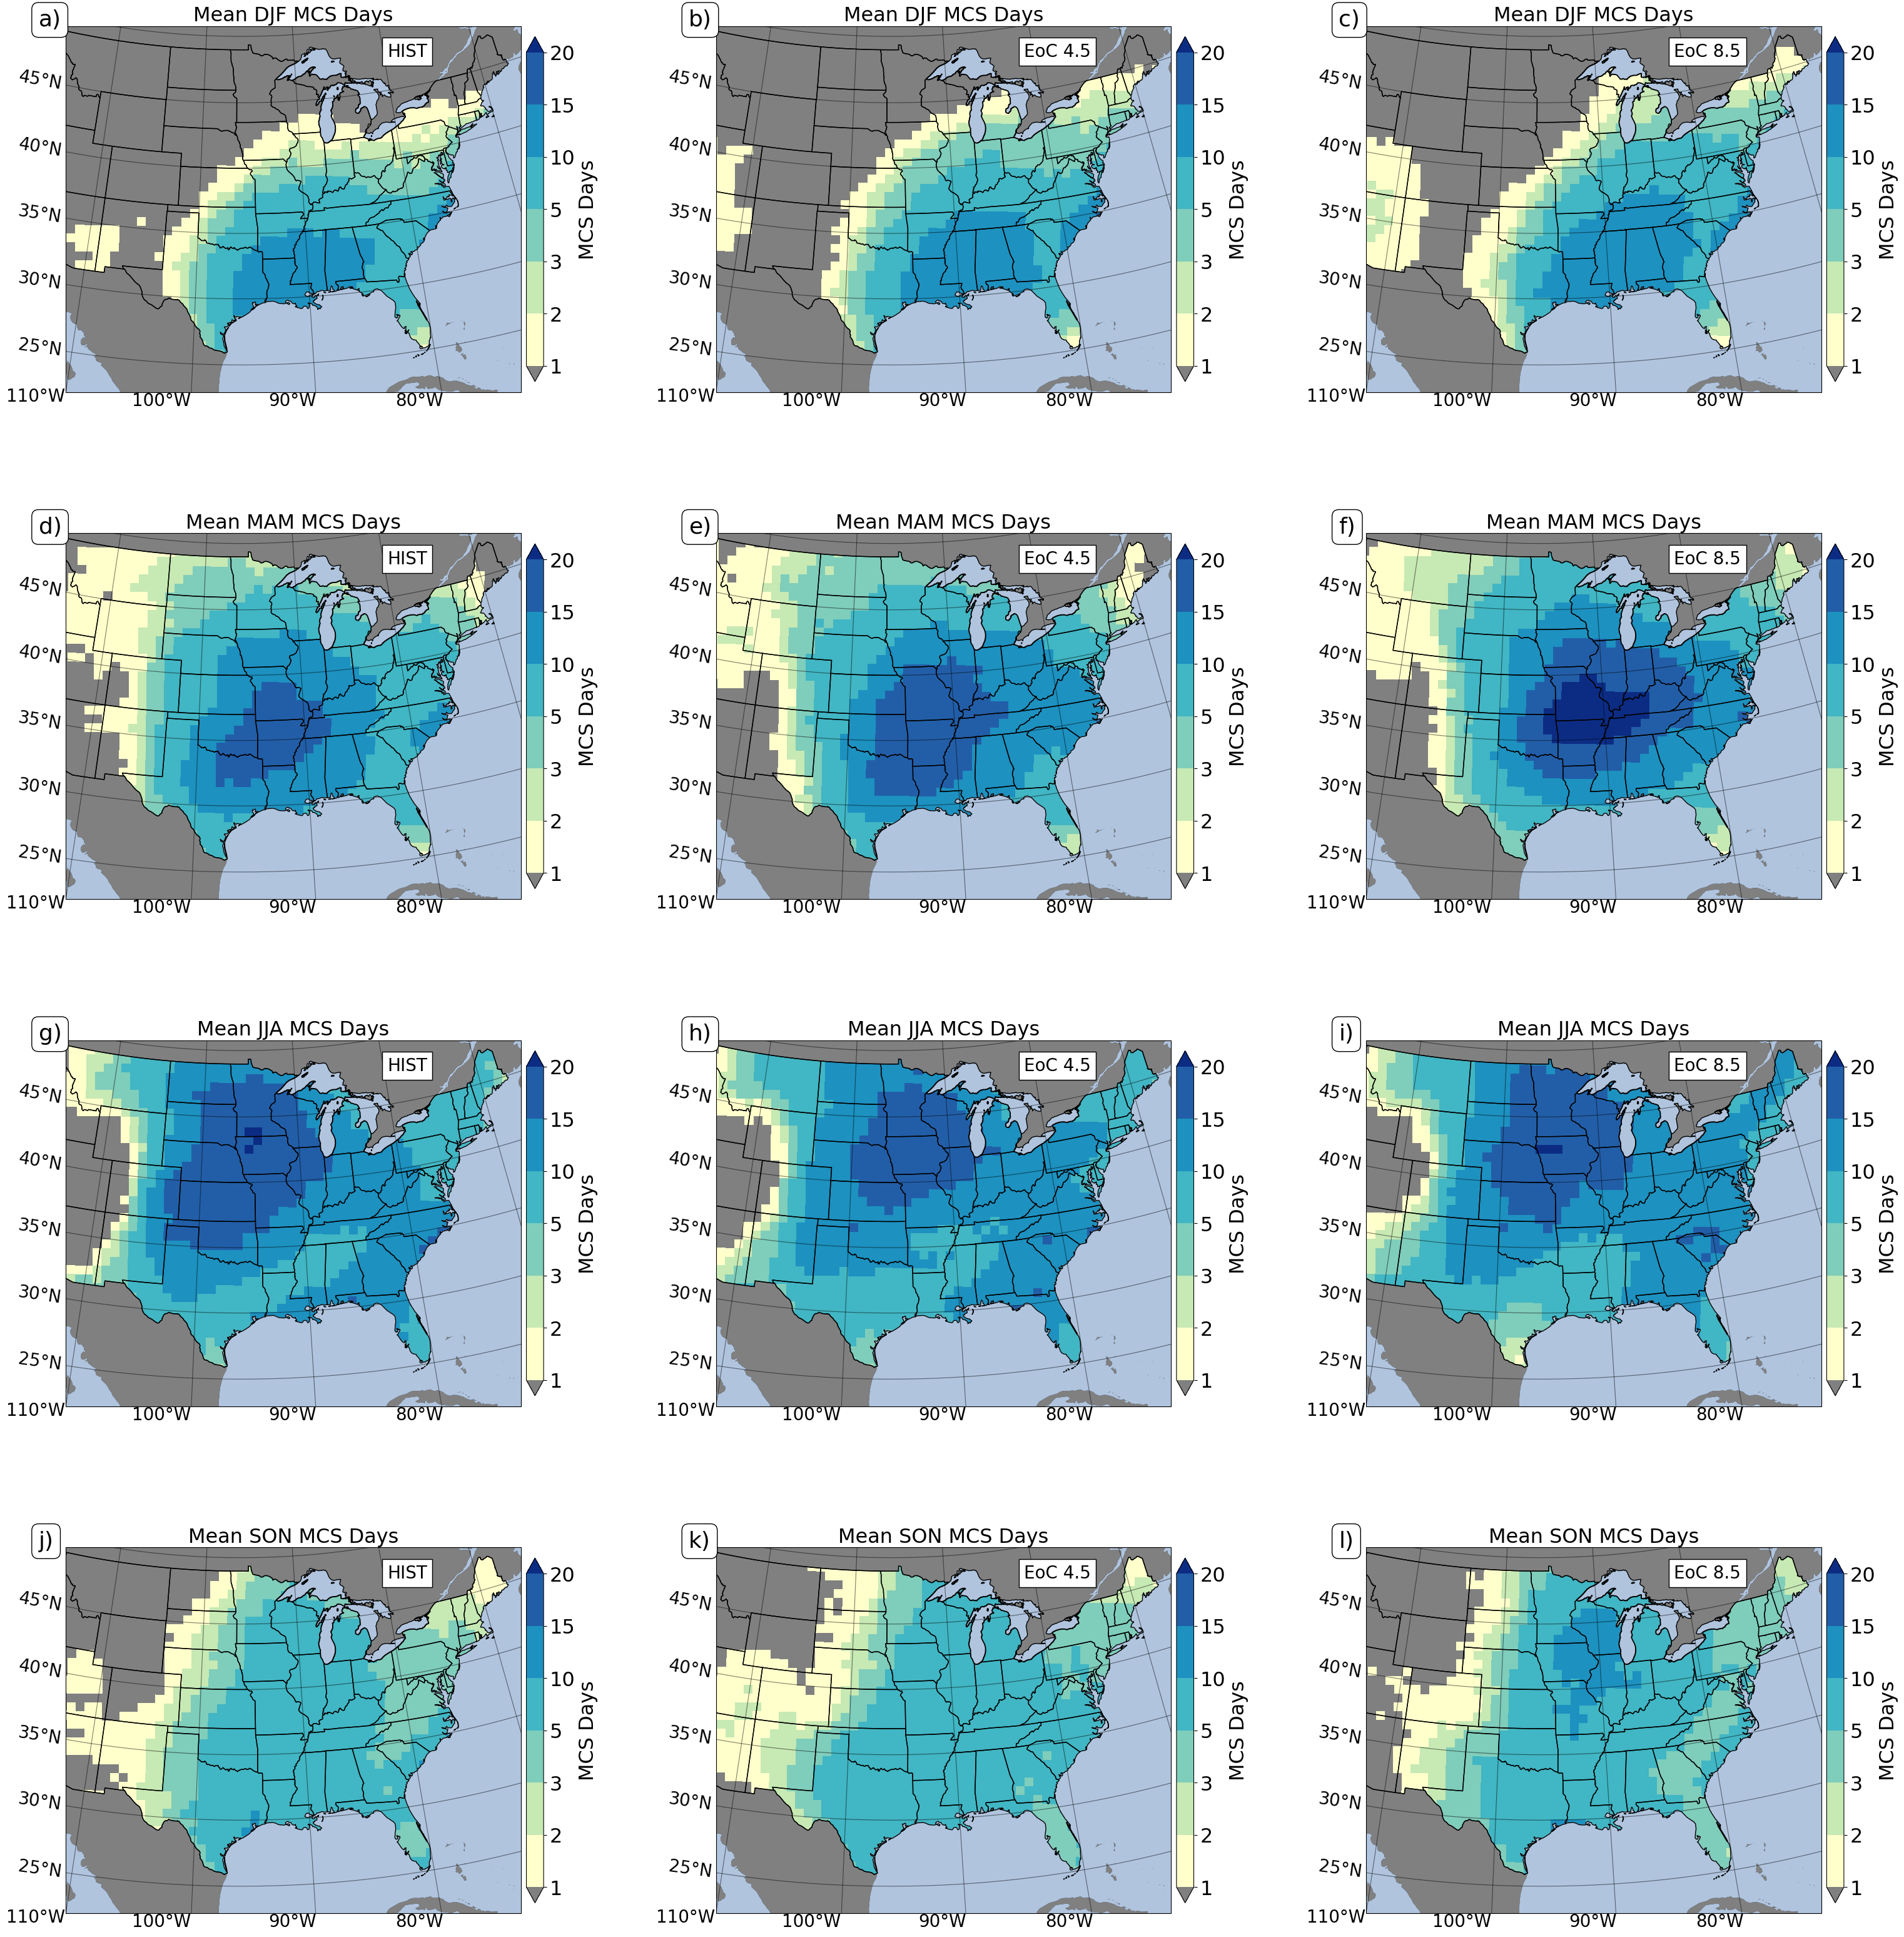

In [3]:
from mapping import setup_map, spec_ax, get_color_dict
from stats import grid_significance
import cartopy.crs as ccrs
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['xtick.labelsize'] = 23
plt.rcParams['ytick.labelsize'] = 23
plt.rcParams['axes.titlesize'] = 23
plt.rcParams['axes.labelsize'] = 23

color_info = get_color_dict(2)

fig = plt.figure(figsize=(38,40))

simulation_dispy = {'historical': 'HIST',
                    'future_4p5': 'EoC 4.5', 
                    'future_8p5': 'EoC 8.5'}

for snum, season in enumerate(['DJF', 'MAM', 'JJA', 'SON']):

    for ax_pos, (sim_name, sim_abbr) in enumerate(simulation_dispy.items()):

        ax = spec_ax(snum, fig, 4, 3, ax_pos)

        ax = setup_map(label_num=(snum*3) + ax_pos+1, ax=ax)

        ax.annotate(f"{sim_abbr}", (0.75,0.93), 
                    xycoords='axes fraction', ha='center', va='center',
                    fontsize=20, bbox=dict(boxstyle='square', facecolor='w', alpha=1), 
                    color='k', zorder=25)

        mmp = ax.pcolormesh(season_means[sim_name][season].lon, season_means[sim_name][season].lat, 
                            season_means[sim_name][season]['MCS_Days'],
                            transform=ccrs.PlateCarree(), 
                            cmap=color_info[sim_name]['cmap'], norm=color_info[sim_name]['norm'], zorder=5)

        cbar = plt.colorbar(mmp, ax=ax, shrink=0.85, extend='both', pad=0.01)
    
        ax.set_title(f"Mean {season} MCS Days")
        
        cbar.set_label(label="MCS Days")
        
        ax.spines['geo'].set_zorder(24)
    
plt.savefig("Figure_S3.png", dpi=200, bbox_inches='tight')